<a href="https://colab.research.google.com/github/SXbro/MNIST_Fashion_dataset/blob/main/MNIST_Fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
GaussianNB accuracy:    0.6715
RandomForest accuracy:  0.8778

Classification report (random forest):
              precision    recall  f1-score   support

 T-shirt/top     0.8183    0.8510    0.8343      1000
     Trouser     0.9928    0.9640    0.9782      1000
    Pullover     0.7779    0.8090    0.7931      1000
       Dress     0.8827    0.9030    0.8927      1000
        Coat     0.7697    0.8220    0.7950      1000
      Sandal     0.9785    0.9560    0.9671      1000
       Shirt     0.7095    0.5960    0.6478      1000
     Sneaker     0.9255    0.9570    0.9410      1000
         Bag     0.9596    0.9740    0.9667      1000
  Ankle boot     0.9536    0.9460    0.9498      1000

    accuracy                         0.8778     10000
   macro avg     0.8768    0.8778    0.8766     10000
weight

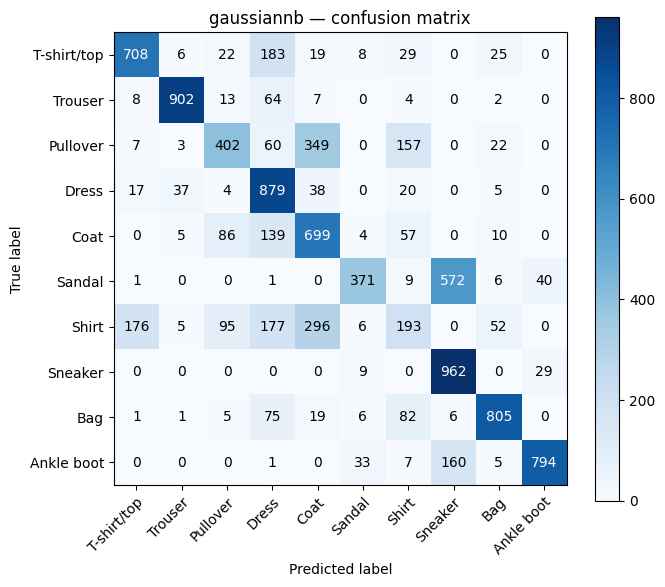

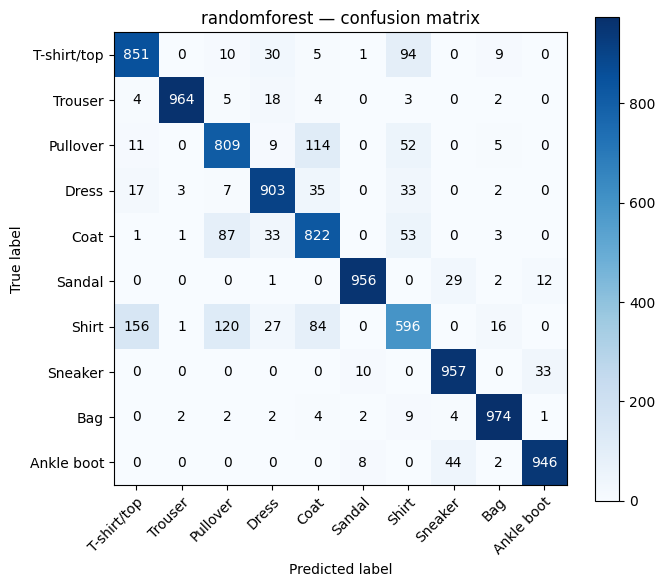

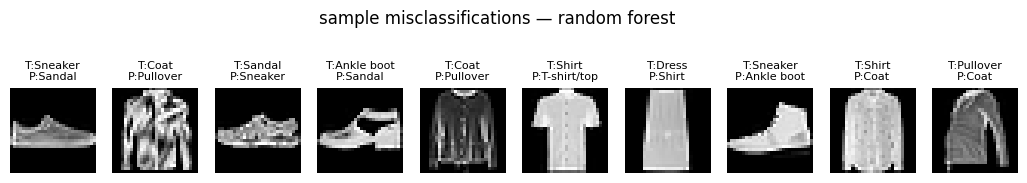

In [1]:


# i applied Random Forest algorithm to increase the accuracy
#  GaussianNB accuracy:    0.6715
# RandomForest accuracy:  0.8778

#  by applying  another algorithm the accuracy increased by 20%
# import libraries : imports
import numpy as np

import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.datasets import fashion_mnist

# define class labels : labels
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# load and reshape data : data loading
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(-1, 784).astype("float32")
X_test  = X_test.reshape(-1, 784).astype("float32")

# gaussian naive bayes feature pipeline [pixels in 0…1 range] : features
Xtr_g = X_train / 255.0
Xte_g = X_test  / 255.0

# train gaussian naive bayes : train naive bayes
gnb = GaussianNB(var_smoothing=1e-2)
gnb.fit(Xtr_g, y_train)

# train random forest : train random forest
rf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# evaluate both models : model evaluation
pred_g = gnb.predict(Xte_g)
pred_rf = rf.predict(X_test)

acc_g = accuracy_score(y_test, pred_g)
acc_rf = accuracy_score(y_test, pred_rf)

print(f"GaussianNB accuracy:    {acc_g:.4f}")
print(f"RandomForest accuracy:  {acc_rf:.4f}\n")

# classification reports : report
print("Classification report (random forest):")
print(classification_report(y_test, pred_rf, target_names=labels, digits=4))

# pretty labeled confusion matrix ashtag: confusion matrix
def plot_cm(cm, class_labels, title):
    fig, ax = plt.subplots(figsize=(7,6))
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(len(class_labels)), yticks=np.arange(len(class_labels)),
           xticklabels=class_labels, yticklabels=class_labels,
           ylabel="True label", xlabel="Predicted label", title=title)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    thresh = cm.max() / 2.
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            ax.text(j, i, str(cm[i, j]),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.show()

cm_g = confusion_matrix(y_test, pred_g)
cm_rf = confusion_matrix(y_test, pred_rf)
plot_cm(cm_g, labels, "gaussiannb — confusion matrix")
plot_cm(cm_rf, labels, "randomforest — confusion matrix")

# show sample mistakes from random forest : qualitative error analysis
wrong = np.where(pred_rf != y_test)[0][:10]
if wrong.size > 0:
    n = wrong.size
    plt.figure(figsize=(13, 2.5))
    for k, idx in enumerate(wrong):
        img = X_test[idx].reshape(28,28)
        plt.subplot(1, n, k+1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
        t, p = labels[y_test[idx]], labels[pred_rf[idx]]
        plt.title(f"T:{t}\nP:{p}", fontsize=8)
    plt.suptitle("sample misclassifications — random forest")
    plt.show()


In [2]:
from sklearn.model_selection import train_test_split

# extra: create validation set
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

rf_val = RandomForestClassifier(
    n_estimators=100, max_depth=30, random_state=42, n_jobs=-1
)
rf_val.fit(X_tr, y_tr)

val_pred = rf_val.predict(X_val)
acc_val = accuracy_score(y_val, val_pred)
print(f"RandomForest validation accuracy: {acc_val:.4f}")


RandomForest validation accuracy: 0.8841
